Name: Tarun Tanmay

Class: MBATech CE 3 Year

Roll No: N049

In [19]:
#Experiment 9 (Performance Parameters)
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [29]:
data = pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#converting categorical data into numerical data
data['Sex_cleaned'] = np.where(data['Sex']=='male',0,1)
data['Embarked_cleaned'] = np.where(data['Embarked']=='C',1,np.where(data['Embarked']=='S',0,np.where(data['Embarked']=='Q',2,3)))
data.shape

(891, 14)

In [32]:
data = data[['Survived', 'Pclass', 'Sex_cleaned', 'Age', 'SibSp', 'Fare', 'Parch','Embarked_cleaned']].dropna(axis=0,how='any')
data.shape

(714, 8)

In [34]:
x = data[['Pclass', 'Sex_cleaned', 'Age', 'SibSp', 'Fare', 'Parch','Embarked_cleaned']]
y = data[['Survived']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [38]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
classifier=KNeighborsClassifier(n_neighbors=14)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [40]:
#construct confusion matrix 
confusion_matrix(y_test,y_pred)

array([[75,  4],
       [23, 41]])

In [42]:
from sklearn.metrics import precision_score,recall_score
a=precision_score(y_test,y_pred)
b=recall_score(y_test,y_pred)
print('precision',a)
print('recall',b)

precision 0.9111111111111111
recall 0.640625


In [43]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7522935779816514

In [55]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(classifier,x_train,y_train,cv=4,method='predict')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when

In [56]:
#plot ROC curve 
from sklearn.metrics import roc_curve 
fpr,tpr,thresholds=roc_curve(y_train,y_scores)

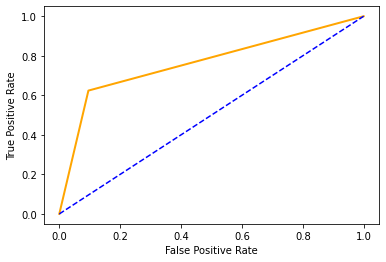

In [57]:
plt.plot(fpr,tpr,linewidth=2,color='orange')
plt.plot([0,1],[0,1],'k--',color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
from sklearn.metrics import confusion_matrix

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

0.7641208156983454

1)Before applying classification algorithm the given Titanic data is cleaned by converting the given categorical data into numerical value and by dropping the rows containg NaN in any of it's columns.

2)KNN classifier is used for the given dataset, and confusion matrix is contructed to determine teh performance of the model.

3)Cross validation is used to generate different sets of training samples, based on that ROC curve is drawn and value of area under the curve is calculated

4)Area under the curve is 0.755, if cross validation number is 3 (cv=3), however the area under the curve increases when cross validation number increases from 3 to 4. (cv=4)